# K - nearest neighbour algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris 

In [ ]:
data = load_iris() 
# Create feature and target arrays 
x = data.data 
y = data.target 
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

create training and test splits

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train)

[[6.4 3.2 5.3 2.3]
 [7.6 3.  6.6 2.1]
 [5.9 3.2 4.8 1.8]
 [6.2 2.9 4.3 1.3]
 [5.  3.5 1.6 0.6]
 [6.7 3.1 5.6 2.4]
 [4.9 2.5 4.5 1.7]
 [7.9 3.8 6.4 2. ]
 [5.2 3.5 1.5 0.2]
 [6.2 2.2 4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [6.5 3.2 5.1 2. ]
 [5.4 3.  4.5 1.5]
 [5.2 2.7 3.9 1.4]
 [6.3 2.9 5.6 1.8]
 [6.1 2.6 5.6 1.4]
 [5.6 3.  4.5 1.5]
 [6.8 3.2 5.9 2.3]
 [5.7 2.8 4.1 1.3]
 [5.7 3.8 1.7 0.3]
 [5.7 2.6 3.5 1. ]
 [4.6 3.4 1.4 0.3]
 [5.  3.  1.6 0.2]
 [7.2 3.2 6.  1.8]
 [4.9 2.4 3.3 1. ]
 [5.1 3.4 1.5 0.2]
 [6.7 3.1 4.4 1.4]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [4.9 3.1 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [6.1 2.8 4.  1.3]
 [4.8 3.4 1.9 0.2]
 [6.1 2.8 4.7 1.2]
 [5.6 3.  4.1 1.3]
 [6.4 3.2 4.5 1.5]
 [6.6 3.  4.4 1.4]
 [5.8 2.7 5.1 1.9]
 [5.1 3.3 1.7 0.5]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [6.2 2.8 4.8 1.8]
 [6.3 2.3 4.4 1.3]
 [6.2 3.4 5.4 2.3]
 [7.3 2.9 6.3 1.8]
 [7.7 2.6 6.9 2.3]
 [5.7 4.4 1.5 0.4]
 [5.5 2.5 4.  1.3]
 [6.5 3.  5.8 2.2]
 [5.  3.4 1.5 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 3.3 4.7 1.6]
 [5.8 2.7 3.

**Normalise the data**

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)


[[ 0.65408513  0.25047525  0.8638899   1.39974828]
 [ 2.06832324 -0.20151016  1.58572614  1.14428091]
 [ 0.06481925  0.25047525  0.58626058  0.76107986]
 [ 0.41837878 -0.42750287  0.30863126  0.12241145]
 [-0.99585934  0.92845338 -1.19056707 -0.77172434]
 [ 1.00764466  0.02448254  1.0304675   1.52748196]
 [-1.11371252 -1.33147371  0.41968299  0.63334618]
 [ 2.42188277  1.6064315   1.47467441  1.01654723]
 [-0.76015299  0.92845338 -1.24609294 -1.28265907]
 [ 0.41837878 -2.00945183  0.41968299  0.37787881]
 [-0.87800616  0.92845338 -1.3016188  -1.28265907]
 [ 0.7719383   0.25047525  0.75283818  1.01654723]
 [-0.52444663 -0.20151016  0.41968299  0.37787881]
 [-0.76015299 -0.87948829  0.08652781  0.25014513]
 [ 0.53623195 -0.42750287  1.0304675   0.76107986]
 [ 0.3005256  -1.105481    1.0304675   0.25014513]
 [-0.28874028 -0.20151016  0.41968299  0.37787881]
 [ 1.12549783  0.25047525  1.19704509  1.39974828]
 [-0.17088711 -0.65349558  0.19757953  0.12241145]
 [-0.17088711  1.6064315  -1.13

Lets predict the class, by considering number of neighbours as 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred,"  ",y_test)

[2 0 2 2 0 1 2 1 2 2 0 1 0 0 1 0 1 2 2 0 1 1 1 1 1 1 1 0 1 2]    [2 0 2 2 0 1 2 1 2 2 0 1 0 0 1 0 1 1 2 0 1 1 1 1 1 1 1 0 1 2]


Evaluate the algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 13  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



The result shows that when we consider the number of neighbours as 5, the result is 97% accuracy. But why 5? how to decide the number of neighbours?
So lets loop the script and find out error (difference between actual and predicted value) for differnt number of neighbours.

let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

[0.03333333333333333]
[0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]
[0.03333333333333333, 0.03333333333333333, 0.0

difficult to understand , so lets plot error vs no of neighbour.so we can conclude which k is more suitable

Text(0, 0.5, 'Mean Error')

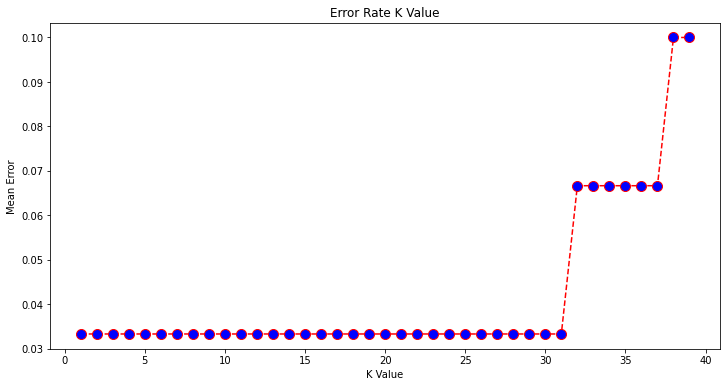

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

so one can see that the MSE (mean square error) is marginal for almost 31 different values of k, but any more number of neighbours may increase the error. i.e. reduce down the accuracy.

**Metrics intended for real-valued vector spaces:**

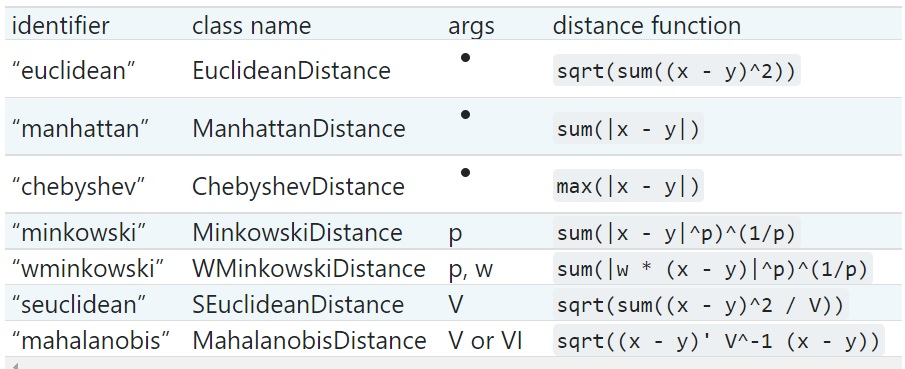

**Metrics intended for integer-valued vector spaces: **

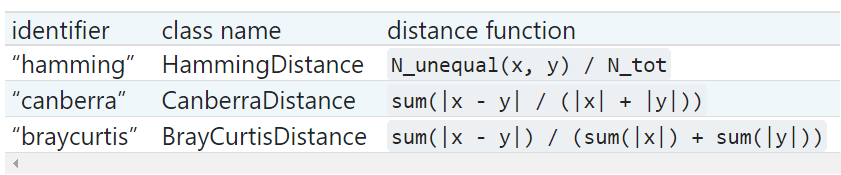

**Metrics intended for boolean-valued vector spaces:**

N : number of dimensions

NTT : number of dims in which both values are True

NTF : number of dims in which the first value is True, second is False

NFT : number of dims in which the first value is False, second is True

NFF : number of dims in which both values are False

NNEQ : number of non-equal dimensions, NNEQ = NTF + NFT

NNZ : number of nonzero dimensions, NNZ = NTF + NFT + NTT

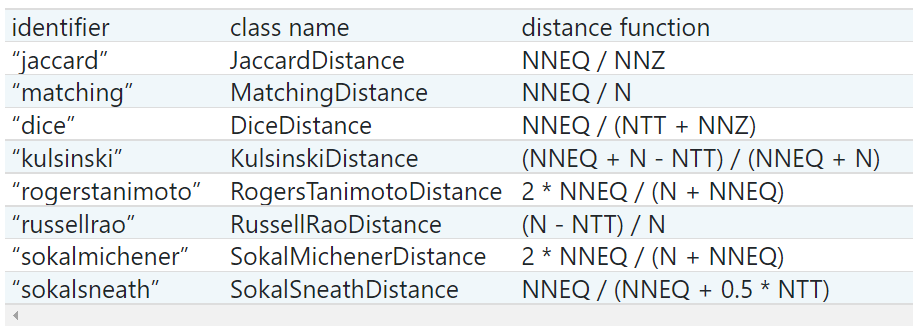